<a href="https://colab.research.google.com/github/GergelyTuri/context-project/blob/main/notebooks/pcb_experiments/anna_notebooks/serotonin_and_mobility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone -b annas https://github.com/GergelyTuri/fiberphotometry.git

Cloning into 'fiberphotometry'...
remote: Enumerating objects: 496, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 496 (delta 8), reused 11 (delta 4), pack-reused 476
Receiving objects: 100% (496/496), 28.29 MiB | 11.51 MiB/s, done.
Resolving deltas: 100% (270/270), done.


In [2]:
%cd fiberphotometry

/content/fiberphotometry


In [3]:
!pip install .

Processing /content/fiberphotometry
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 1.7 MB/s eta 0:00:00
  Created wheel for fiber-photometry-analysis: filename=fiber_photometry_analysis-0.1-py3-none-any.whl size=9360 sha256=63a9c8d43de4d4d89773d35e8474a92f609f98ce3ab4612083e1d6a0df68c14d
  Stored in directory: /tmp/pip-ephem-wheel-cache-o8ey5i_j/wheels/4b/b6/cf/916d1f43d06b8bc573d2ec7471e525018bf5ea7bcf83b8e670
Successfully built fiber-photometry-analysis


In [4]:
! git pull

Already up to date.


In [5]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [6]:
from Anna.serotonin_mobility_analysis import load_and_merge_data, extract_and_compare_serotonin, calculate_average_serotonin, load_and_process_file, calculate_total_distance
import matplotlib.pyplot as plt
from Anna.serotonin_mobility_plotting import plot_serotonin_levels, plot_velocities, plot_distances
from datetime import datetime
import pandas as pd
import numpy as np
from Anna.serotonin_overlay_analysis import (
    load_block_data,
    process_fluorescence_data,
    calculate_zscore,
    save_to_csv,
    load_and_process_behavior_data,
    preprocess_velocity_data,
    gaussian_smooth,
    plot_velocity
)
from Anna.serotonin_overlay_plotting import (
    plot_zscore_signal,
    plot_overlay,
    plot_velocities,
    plot_distances
)




T-test for mobile state: t-statistic = -400.36203153378494, p-value = 0.0
T-test for immobile state: t-statistic = -43.66699076569309, p-value = 0.0


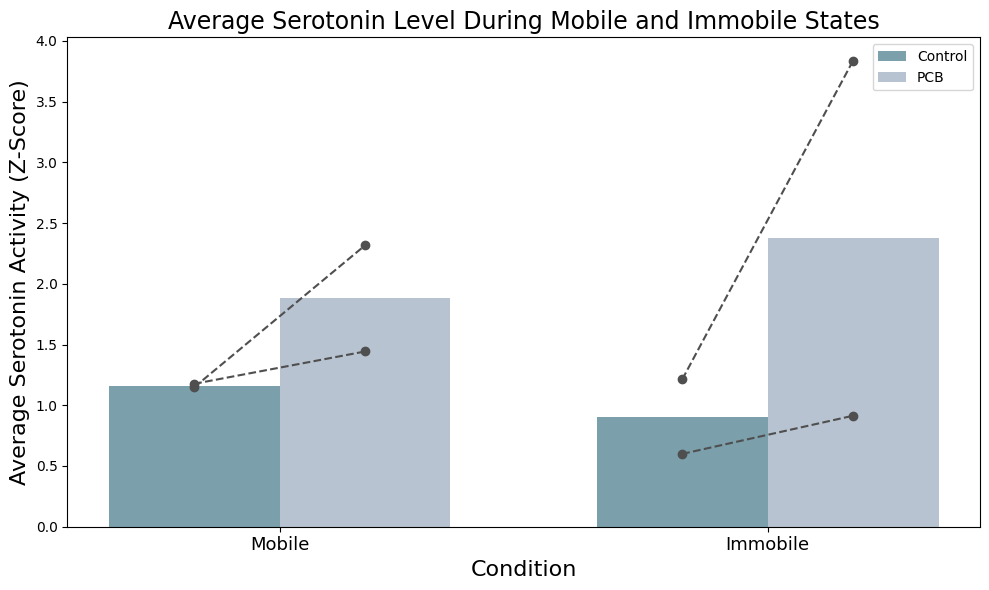

In [10]:


def main():
    control_mobility_paths = [
        '/gdrive/Shareddrives/Turi_lab/DeepLabCut/DLC_model_training/fiberphotometry/serotonin_fiberphotometry/mobility_control_jack.csv',
        '/gdrive/Shareddrives/Turi_lab/DeepLabCut/DLC_model_training/fiberphotometry/serotonin_fiberphotometry/mobility_control_nia2.csv'
    ]
    control_serotonin_paths = [
        '/gdrive/Shareddrives/Turi_lab/DeepLabCut/DLC_model_training/fiberphotometry/serotonin_fiberphotometry/serotonin_df_control_nia11.csv',
        '/gdrive/Shareddrives/Turi_lab/DeepLabCut/DLC_model_training/fiberphotometry/serotonin_fiberphotometry/serotonin_df_control_nia2.csv'
    ]
    pcb_mobility_paths = [
        '/gdrive/Shareddrives/Turi_lab/DeepLabCut/DLC_model_training/fiberphotometry/serotonin_fiberphotometry/mobility_pcb_jack.csv',
        '/gdrive/Shareddrives/Turi_lab/DeepLabCut/DLC_model_training/fiberphotometry/serotonin_fiberphotometry/mobility_pcb_nia2.csv'
    ]
    pcb_serotonin_paths = [
        '/gdrive/Shareddrives/Turi_lab/DeepLabCut/DLC_model_training/fiberphotometry/serotonin_fiberphotometry/serotonin_df_pcb_nia11.csv',
        '/gdrive/Shareddrives/Turi_lab/DeepLabCut/DLC_model_training/fiberphotometry/serotonin_fiberphotometry/serotonin_df_pcb_nia2.csv'
    ]

    merged_control_df, merged_pcb_df, merged_control_dfs, merged_pcb_dfs = load_and_merge_data(
        control_mobility_paths, control_serotonin_paths, pcb_mobility_paths, pcb_serotonin_paths)

    extract_and_compare_serotonin(merged_control_df, merged_pcb_df)

    averages, overall_averages = calculate_average_serotonin(merged_control_dfs, merged_pcb_dfs)

    plot_serotonin_levels(averages, overall_averages)

if __name__ == "__main__":
    main()


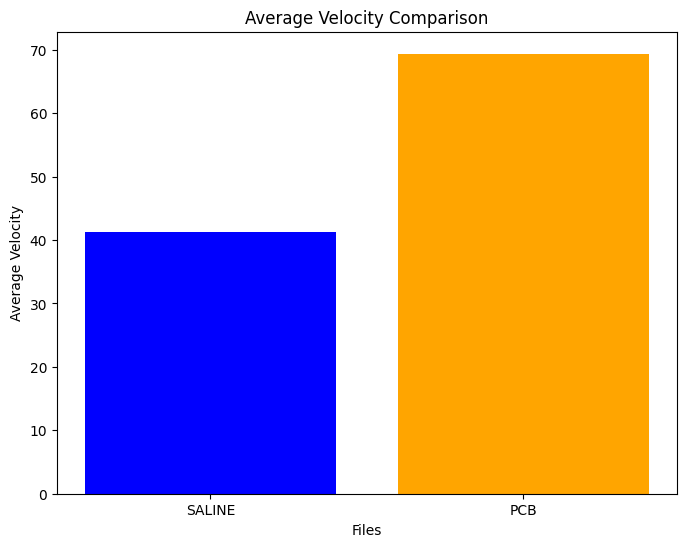

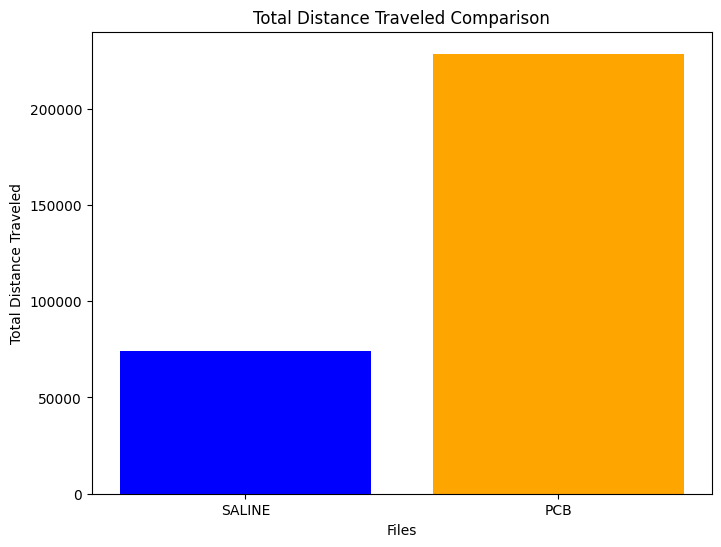

In [6]:
#plot average velocity and total distance traveled

def main():
    # Define file paths
    file_paths = [
        '/gdrive/Shareddrives/Turi_lab/DeepLabCut/DLC_model_training/fiberphotometry/serotonin_fiberphotometry/pcb_test-gergo-2024-07-02/videos/drug_experiment-240625-124323_nia_2-240628-133011_Cam1DLC_resnet50_pcb_testJul2shuffle1_1030000.h5',
        '/gdrive/Shareddrives/Turi_lab/DeepLabCut/DLC_model_training/fiberphotometry/serotonin_fiberphotometry/pcb_test-gergo-2024-07-02/videos/drug_experiment-240625-124323_nia_2-240701-094343_Cam1DLC_resnet50_pcb_testJul2shuffle1_1030000.h5'
    ]

    # Process each file and calculate mean velocities
    velocities = [load_and_process_file(file_path) for file_path in file_paths]

    # Define labels
    labels = ['SALINE', 'PCB']

    # Plot the velocities
    plot_velocities(velocities, labels)

    # Calculate total distances traveled
    distances = [calculate_total_distance(file_path) for file_path in file_paths]

    # Plot the distances
    plot_distances(distances, labels)

if __name__ == "__main__":
    main()

Found Synapse note file: /gdrive/Shareddrives/Turi_lab/Data/psilocybin_project/PCB_Serotonin/drug_experiment-240625-124323/nia_11-240626-142339/Notes.txt
read from t=0s to t=3719.62s
Found Synapse note file: /gdrive/Shareddrives/Turi_lab/Data/psilocybin_project/PCB_Serotonin/drug_experiment-240625-124323/jack-240627-105240/Notes.txt
read from t=0s to t=5400.24s


/content/fiberphotometry/Anna/serotonin_overlay_analysis.py:14: RankWarning:

Polyfit may be poorly conditioned

/content/fiberphotometry/Anna/serotonin_overlay_analysis.py:14: RankWarning:

Polyfit may be poorly conditioned



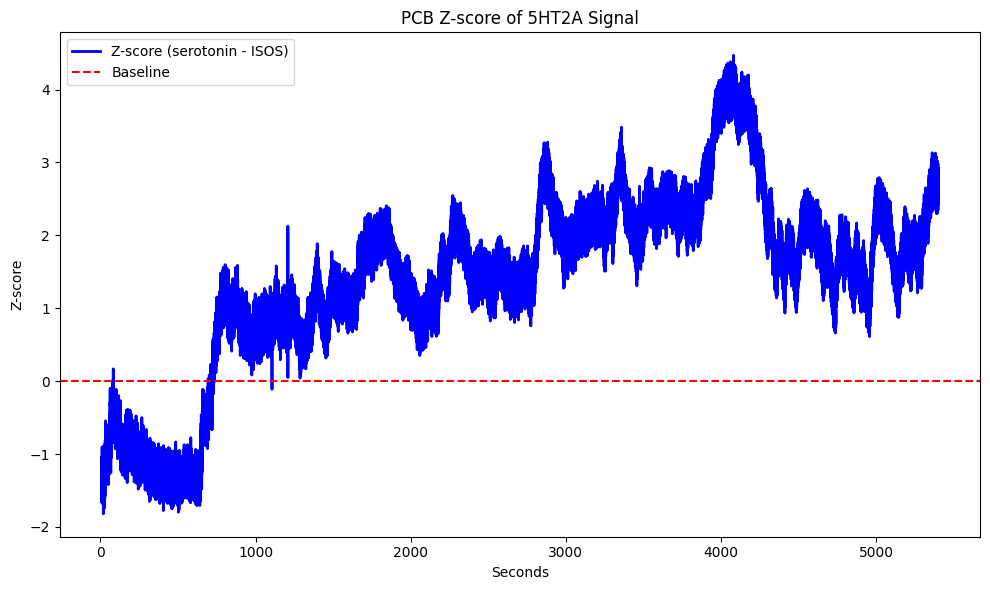

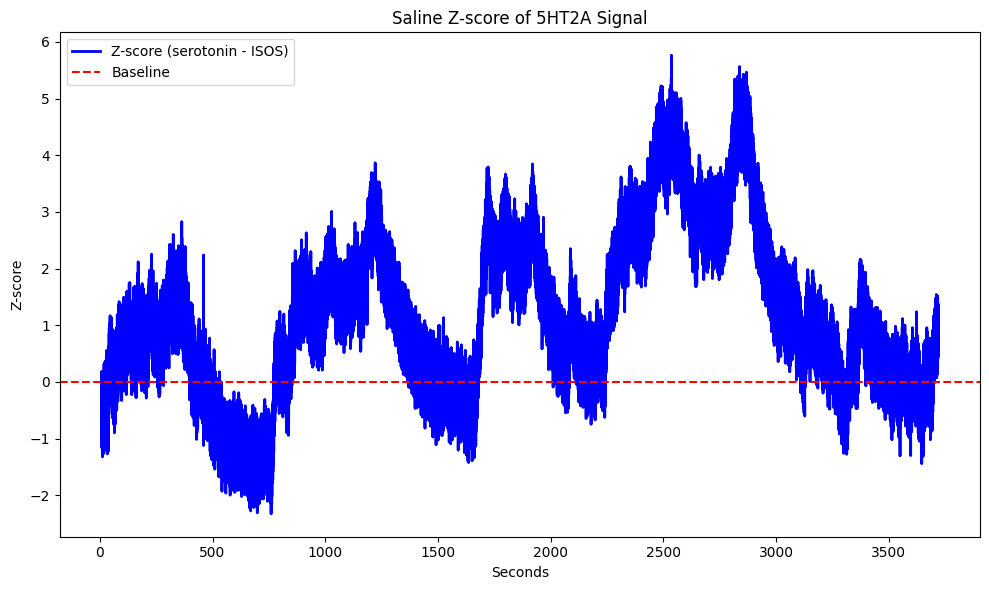

In [7]:

def main():
    # Paths
    saline_path = "/gdrive/Shareddrives/Turi_lab/Data/psilocybin_project/PCB_Serotonin/drug_experiment-240625-124323/nia_11-240626-142339"
    pcb_path = "/gdrive/Shareddrives/Turi_lab/Data/psilocybin_project/PCB_Serotonin/drug_experiment-240625-124323/jack-240627-105240"
    velocity_path = '/gdrive/Shareddrives/Turi_lab/DeepLabCut/DLC_model_training/fiberphotometry/serotonin_fiberphotometry/velocity_smoothed.csv'
    serotonin_path = '/gdrive/Shareddrives/Turi_lab/DeepLabCut/DLC_model_training/fiberphotometry/serotonin_fiberphotometry/serotonin_df.csv'

    # Load block data
    saline_block = load_block_data(saline_path)
    pcb_block = load_block_data(pcb_path)

    # Process fluorescence data
    delF_saline, saline_block = process_fluorescence_data(saline_block)
    delF_pcb, pcb_block = process_fluorescence_data(pcb_block)

    # Save delF values to CSV
    save_to_csv(delF_saline, 'delF_saline_output.csv')
    save_to_csv(delF_pcb, 'delF_pcb_output.csv')

   # Corrected signal for PCB
    corrected_signal_pcb = delF_pcb - pcb_block['streams']['_405A'].data

    # Experiment times
    start_time_str = '10:52:44am'
    bline_end_str = '11:19:08am'
    start_time = datetime.strptime(start_time_str, '%I:%M:%S%p')
    bline_end_time = datetime.strptime(bline_end_str, '%I:%M:%S%p')
    bline_end_sec = (bline_end_time - start_time).total_seconds()

    # Calculate z-score signal for PCB
    time_x, zscore_signal_pcb, baseline_end_idx_pcb = calculate_zscore(corrected_signal_pcb, bline_end_sec, 8, pcb_block['streams']['_465A'].fs)

    # Plot z-score signal for PCB
    plot_zscore_signal(time_x, zscore_signal_pcb, baseline_end_idx_pcb, title="PCB Z-score of 5HT2A Signal")

    # Save z-score data to CSV for PCB
    zscore_signal_df_pcb = pd.DataFrame({'Time (s)': time_x, 'Z-score': zscore_signal_pcb})
    zscore_signal_df_pcb.to_csv('/gdrive/Shareddrives/Turi_lab/DeepLabCut/DLC_model_training/fiberphotometry/serotonin_fiberphotometry/serotonin_df_pcb_nia11.csv', index=False)

    # Corrected signal for Saline
    corrected_signal_saline = delF_saline - saline_block['streams']['_405A'].data

    # Experiment times for Saline
    start_time_str_saline = '2:23:43pm'
    bline_end_str_saline = '2:37:11pm'
    start_time_saline = datetime.strptime(start_time_str_saline, '%I:%M:%S%p')
    bline_end_time_saline = datetime.strptime(bline_end_str_saline, '%I:%M:%S%p')
    bline_end_sec_saline = (bline_end_time_saline - start_time_saline).total_seconds()

    # Calculate z-score signal for Saline
    time_x_saline, zscore_signal_saline, baseline_end_idx_saline = calculate_zscore(corrected_signal_saline, bline_end_sec_saline, 8, saline_block['streams']['_465A'].fs)

    # Plot z-score signal for Saline
    plot_zscore_signal(time_x_saline, zscore_signal_saline, baseline_end_idx_saline, title="Saline Z-score of 5HT2A Signal")

    # Save z-score data to CSV for Saline
    zscore_signal_df_saline = pd.DataFrame({'Time (s)': time_x_saline, 'Z-score': zscore_signal_saline})
    zscore_signal_df_saline.to_csv('/gdrive/Shareddrives/Turi_lab/DeepLabCut/DLC_model_training/fiberphotometry/serotonin_fiberphotometry/serotonin_df_control_nia11.csv', index=False)

    # Behavior data processing
    h5_path = '/gdrive/Shareddrives/Turi_lab/DeepLabCut/DLC_model_training/fiberphotometry/serotonin_fiberphotometry/pcb_test-gergo-2024-07-02/videos/drug_experiment-240625-124323_nia_2-240701-094343_Cam1DLC_resnet50_pcb_testJul2shuffle1_1030000.h5'
    mean_velocity, total_distance = load_and_process_behavior_data(h5_path)


    # Load and merge data
    merged_data = preprocess_velocity_data(velocity_path, serotonin_path)

    # Define experiment times for plotting
    start_time_seconds = 9 * 3600 + 43 * 60 + 48  # 9:43:48am
    injection_time_seconds = 10 * 3600 + 9 * 60 + 23  # 10:09:23am
    stop_time_seconds = 11 * 3600 + 7 * 60 + 6  # 11:07:06am
    injection_relative_time = injection_time_seconds - start_time_seconds

    # Plot overlay
    plot_overlay(merged_data, merged_data, injection_relative_time, stop_time_seconds, start_time_seconds)


if __name__ == "__main__":
    main()
